In [1]:
import json
from sqlalchemy import create_engine
import pandas as pd
# import geopandas as gpd

In [2]:
creds = json.load(open('dbcreds.json','r'))
engine = create_engine(f"postgresql://{creds['DB_USER']}:{creds['DB_PW']}@{creds['DB_SERVER']}:{creds['DB_PORT']}/{creds['DB_DBNAME']}")

In [3]:
# lat, lon = 28.5, 72.5
lat, lon = 18.50,74.00
start_year = 1901
end_year = 2021

In [4]:
s1 = f"""select year1, month1, data from imd_data
where year1 between {start_year} and {end_year}
and ST_Y(geometry)={lat}
and ST_X(geometry)={lon}
order by year1, month1
"""
print(s1)

select year1, month1, data from imd_data
where year1 between 1901 and 2021
and ST_Y(geometry)=18.5
and ST_X(geometry)=74.0
order by year1, month1



In [5]:
df1 = pd.read_sql(s1, con=engine)

In [67]:
def process1(data):
    # data is going to be the dict above
    rainArr = []
    
    zeroRainCounter = 0
    
    for date1 in data.keys():
        row = data[date1]
        if row.get('rain',False) is not False:
            rainArr.append(row['rain'])
            if row['rain'] == 0: zeroRainCounter += 1
        
    cumulativeRain = round(sum(rainArr),2)    
    days_wRain = len(data.keys())-zeroRainCounter
    
    return cumulativeRain, zeroRainCounter, days_wRain

In [68]:
df1[['cumulativeRain', 'days_noRain', 'days_wRain']] = df1['data'].apply(lambda x: pd.Series(process1(x)))

# this method is used to derive muliple columns out of one column in dataframes

In [69]:
df1

,year1,month1,data,cumulativeRain,avgTmax,avgTmin,days_noRain,days_over40,days_below15,days_wRain
0,1901,1,"{'1901-01-01': {'rain': 0.0}, '1901-01-02': {'...",21.75,NaN,NaN,28.0,0.0,0.0,3.0
1,1901,2,"{'1901-02-01': {'rain': 0.0}, '1901-02-02': {'...",2.06,NaN,NaN,27.0,0.0,0.0,1.0
2,1901,3,"{'1901-03-01': {'rain': 0.0}, '1901-03-02': {'...",2.78,NaN,NaN,29.0,0.0,0.0,2.0
3,1901,4,"{'1901-04-01': {'rain': 0.0}, '1901-04-02': {'...",22.56,NaN,NaN,23.0,0.0,0.0,7.0
4,1901,5,"{'1901-05-01': {'rain': 0.5465522408485413}, '...",23.57,NaN,NaN,21.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...
1447,2021,8,"{'2021-08-01': {'rain': 0.7499823570251465}, '...",30.79,NaN,NaN,9.0,0.0,0.0,22.0
1448,2021,9,"{'2021-09-01': {'rain': 0.43908950686454773}, ...",104.78,NaN,NaN,2.0,0.0,0.0,28.0
1449,2021,10,"{'2021-10-01': {'rain': 0.10812845081090927}, ...",133.58,NaN,NaN,19.0,0.0,0.0,12.0
1450,2021,11,"{'2021-11-01': {'rain': 0.0}, '2021-11-02': {'...",33.11,NaN,NaN,22.0,0.0,0.0,8.0


## Visualize it
following https://seaborn.pydata.org/examples/spreadsheet_heatmap.html

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme(palette='bright')

In [79]:
df2 = df1.fillna('').copy()

In [80]:
def rounding(x):
    if x == '':
        return None
    if x is not None:
        return round(x)
    else: 
        return None

df2['cumulativeRain'] = df2['cumulativeRain'].apply(rounding)
df2['days_noRain'] = df2['days_noRain'].apply(rounding)
df2['days_wRain'] = df2['days_wRain'].apply(rounding)

Reference: all the color styles on offer
```
ValueError: 'bright' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
```

## Viz 1: Monthly cumulative rainfall

### let's put months in x axis, years in y axis

In [81]:
pivot1 = df2.pivot("year1", "month1", "cumulativeRain")
pivot1

month1,1,2,3,4,5,6,7,8,9,10,11,12
year1,,,,,,,,,,,,
1901,22,2,3,23,24,67,89,103,77,90,4,0
1902,2,0,0,0,31,57,108,71,158,49,37,64
1903,0,0,0,2,78,77,178,60,122,82,7,0
1904,1,0,0,1,9,38,37,14,123,126,0,0
1905,0,0,0,0,30,50,94,47,22,68,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,0,0,0,0,13,159,140,134,161,121,19,2
2018,0,0,2,4,6,116,126,86,29,58,12,0
2019,0,0,0,6,0,167,304,156,253,270,58,1


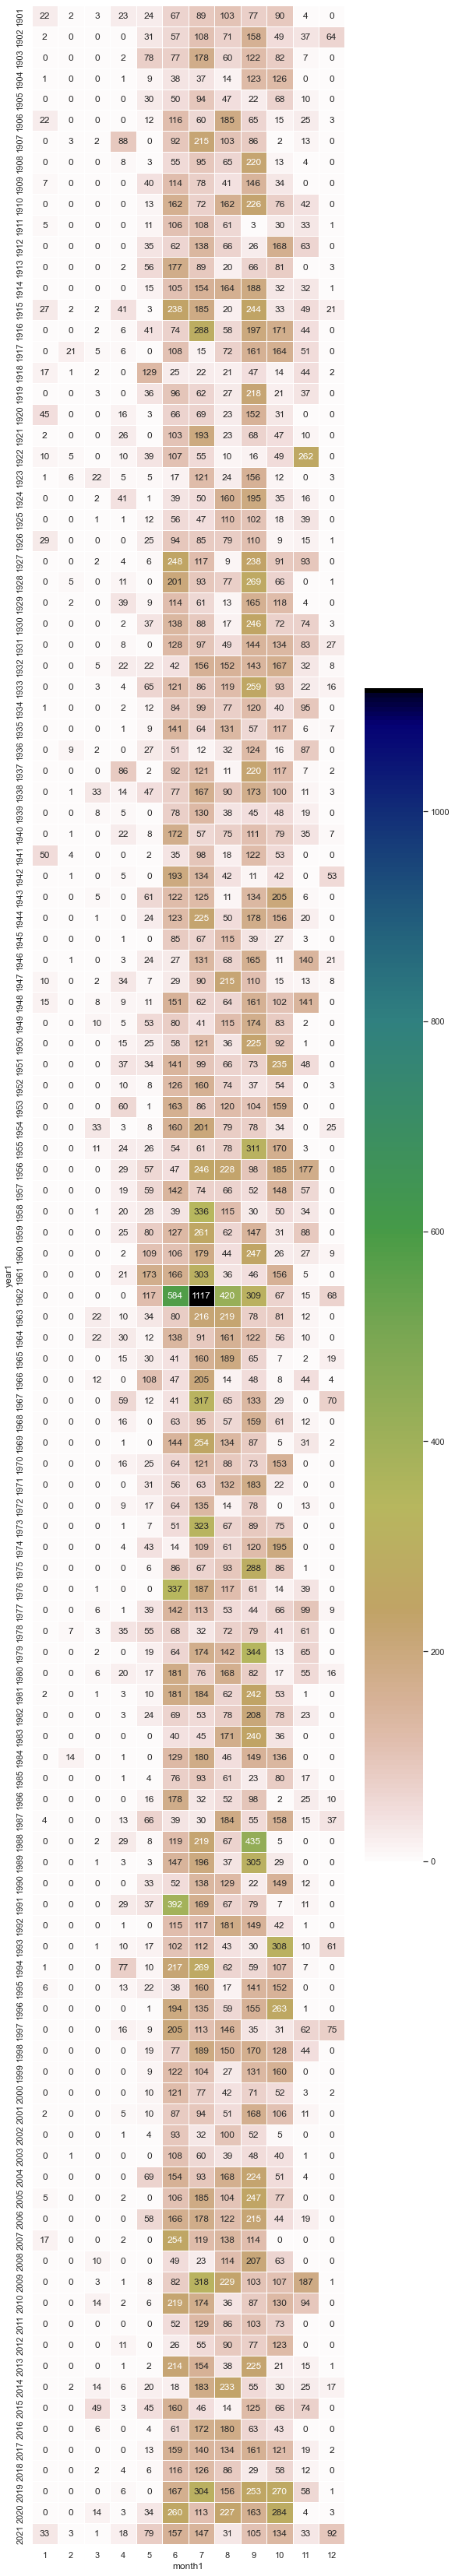

In [82]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 60))
h1 = sns.heatmap(pivot1, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='gist_earth_r')
# GnBu, gist_earth_r, Greens, PuRd, inferno_r

In [105]:
# save to file, from https://www.geeksforgeeks.org/how-to-save-seaborn-plot-to-a-file-in-python/
h1.get_figure().savefig(f"rainV_{lat},{lon}.png", bbox_inches='tight')

## Viz 2: Monthly days with rain

In [88]:
pivot2 = df2.pivot("year1", "month1", "days_wRain")
pivot2

month1,1,2,3,4,5,6,7,8,9,10,11,12
year1,,,,,,,,,,,,
1901,3,1,2,7,10,15,24,29,14,10,3,0
1902,2,0,0,1,4,15,24,15,19,15,9,12
1903,1,0,0,1,8,16,30,20,19,10,4,0
1904,1,0,0,1,5,18,22,16,22,17,0,0
1905,0,0,0,0,7,12,24,18,9,12,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,0,0,0,0,5,17,28,25,19,12,4,1
2018,0,0,1,2,1,15,26,28,13,10,4,0
2019,0,0,0,4,0,15,28,23,26,19,5,1


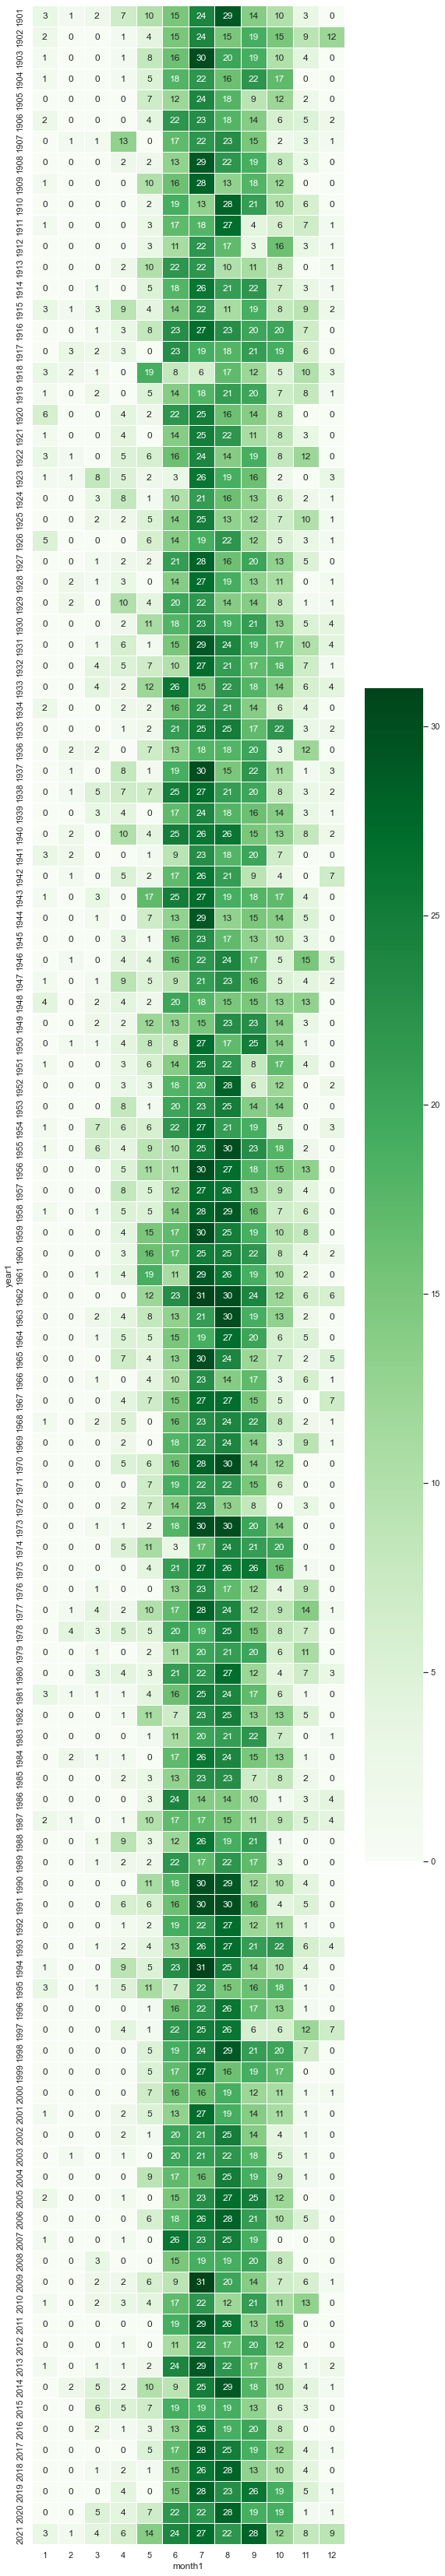

In [89]:
f, ax = plt.subplots(figsize=(9, 60))
h2 = sns.heatmap(pivot2, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='Greens')

In [106]:
h2.get_figure().savefig(f"daysWrainV_{lat},{lon}.png", bbox_inches='tight')

## without the labels

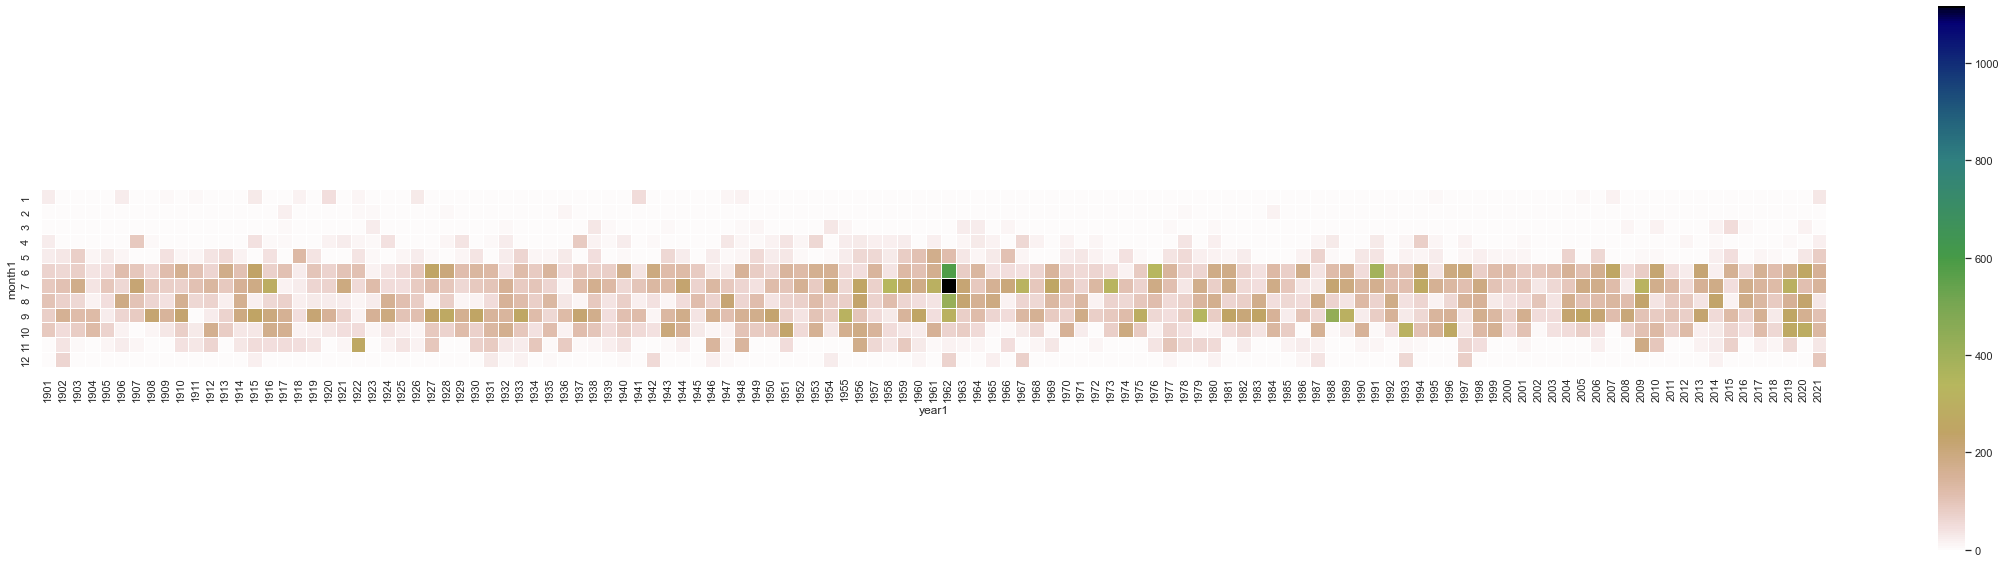

In [103]:
pivot3 = df2.pivot("month1", "year1", "cumulativeRain")
f, ax = plt.subplots(figsize=(40, 10))
h1_b = sns.heatmap(pivot3, annot=False, fmt="d", linewidths=.5, ax=ax, cmap='gist_earth_r', square=True)

In [104]:
h1_b.get_figure().savefig(f"rainH_{lat},{lon}.png", bbox_inches='tight')

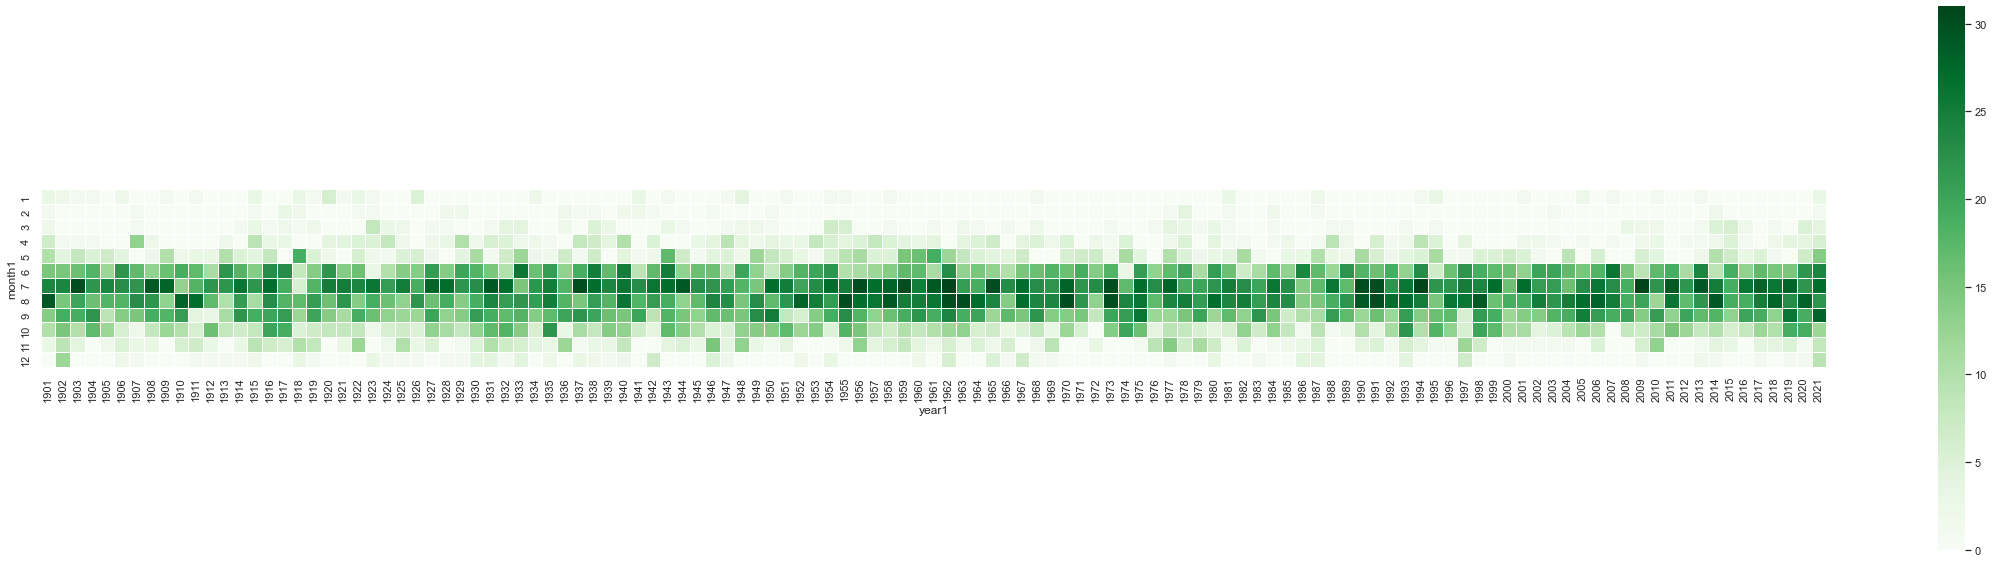

In [108]:
pivot4 = df2.pivot("month1", "year1", "days_wRain")
f, ax = plt.subplots(figsize=(40, 10))
h2_b = sns.heatmap(pivot4, annot=False, fmt="d", linewidths=.5, ax=ax, cmap='Greens', square=True)

In [109]:
h2_b.get_figure().savefig(f"daysWrainH_{lat},{lon}.png", bbox_inches='tight')